# Classifier that recreates the Dielemann architecture
https://github.com/DiegoAgher/Music-Classification/blob/master/models/Dielemann.py

http://benanne.github.io/2014/08/05/spotify-cnns.html

In [1]:
import numpy as np

# data_x = np.load('data_x_scipy.npy')
# data_y = np.load('data_y_scipy.npy')

data_x = np.load('data_x_mel_spectro.npy')
data_y = np.load('data_y_mel_spectro.npy')

data_x = np.transpose(data_x, (0,2,1))

In [2]:
print(np.min(data_x[0:1000,:,:]))
print(np.max(data_x[0:1000,:,:]))
print(np.mean(data_x[0:1000,:,:]))
print(np.std(data_x[0:1000,:,:]))

0.0
1.0000000000000142
0.48029030171437953
0.23375512558438383


In [2]:
# data_x = data_x.reshape(data_x.shape[0], 128*1200)
# data_x = (data_x - np.mean(data_x, axis=1, keepdims=True)) / (np.std(data_x, axis=1, keepdims=True) + 1.0e-8)


In [3]:
# data_x = data_x.reshape(data_x.shape[0], 128, 1200)

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.01, random_state=0)

del data_x, data_y

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.20, random_state=0)

In [4]:

from keras.layers import Input, Conv1D, MaxPooling1D, Dense, Dropout,\
    GlobalAveragePooling1D, GlobalMaxPooling1D, Add
from keras.models import Sequential
from keras.regularizers import l2
# from keras.regularizers import Regularizer
# from keras.callbacks import TensorBoard
# import matplotlib.pyplot as plt
from keras.layers import Flatten
from keras.models import Model
# from keras.models import Sequential
# from keras.layers import Dense, Dropout
# from keras.layers import Embedding
# from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
# from keras.optimizers import SGD
# from time import time
# import datetime

C:\Program Files\Python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
nb_filters_1=30#10
nb_filters_2=60#20
lenght_filters=4
pool_size_1=4
pool_size_2=2
dropout_prob_1=0.5
dropout_prob_2=0.5
# frames=2580
# frequency=128
frames = x_train.shape[1]
frequency = x_train.shape[2]
dense_size=100
nb_classes= y_train.shape[1]


input_placeholder = Input(shape=(frames, frequency))

conv_1 = Conv1D(nb_filters_1, lenght_filters,
                activation='relu', border_mode='same')(
            input_placeholder)
pool_1 = MaxPooling1D(pool_size_1)(conv_1)

conv_2 = Conv1D(nb_filters_1, lenght_filters,
                border_mode='same', activation='relu')(pool_1)
pool_2 = MaxPooling1D(pool_size_1)(conv_2)

conv_3 = Conv1D(nb_filters_2, lenght_filters,
                border_mode='same', activation='relu')(pool_2)
pool_3 = MaxPooling1D(pool_size_2)(conv_3)

global_mean = GlobalAveragePooling1D()(pool_3)
global_max = GlobalMaxPooling1D()(pool_3)

# concat = merge([global_mean, global_max], mode='concat',
#                concat_axis=-1)
concat = Add()([global_mean, global_max])

hidden = Dense(dense_size, activation='relu')(concat)
drop_1 = Dropout(dropout_prob_1)(hidden)
hidden_2 = Dense(dense_size, activation='relu')(drop_1)
drop_2 = Dropout(dropout_prob_1)(hidden_2)

output = Dense(nb_classes, activation='softmax')(drop_2)

model = Model(input=input_placeholder, output=output)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1200, 128)    0                                            
__________________________________________________________________________________________________
conv1d_4 (Conv1D)               (None, 1200, 30)     15390       input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling1d_4 (MaxPooling1D)  (None, 300, 30)      0           conv1d_4[0][0]                   
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 300, 30)      3630        max_pooling1d_4[0][0]            
__________________________________________________________________________________________________
max_poolin

C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(30, 4, activation="relu", padding="same")`
C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(30, 4, activation="relu", padding="same")`
C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(60, 4, activation="relu", padding="same")`
C:\Program Files\Python36\lib\site-packages\ipykernel_launcher.py:45: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [9]:
nb_epoch = 100
batch_size = 64
model.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch,
                       validation_data=(x_val,y_val))

Train on 6330 samples, validate on 1583 samples
Epoch 1/100
6330/6330 [==============================] - 16s 3ms/step - loss: 2.0570 - acc: 0.1637 - val_loss: 1.9802 - val_acc: 0.2653
Epoch 2/100
6330/6330 [==============================] - 15s 2ms/step - loss: 1.9757 - acc: 0.2174 - val_loss: 1.9203 - val_acc: 0.2874
Epoch 3/100
6330/6330 [==============================] - 15s 2ms/step - loss: 1.9100 - acc: 0.2551 - val_loss: 1.8582 - val_acc: 0.2963
Epoch 4/100
6330/6330 [==============================] - 15s 2ms/step - loss: 1.8567 - acc: 0.2863 - val_loss: 1.7979 - val_acc: 0.3335
Epoch 5/100
6330/6330 [==============================] - 15s 2ms/step - loss: 1.8178 - acc: 0.3085 - val_loss: 1.7713 - val_acc: 0.3386
Epoch 6/100
6330/6330 [==============================] - 15s 2ms/step - loss: 1.7858 - acc: 0.3232 - val_loss: 1.7449 - val_acc: 0.3474
Epoch 7/100
6330/6330 [==============================] - 15s 2ms/step - loss: 1.7632 - acc: 0.3387 - val_loss: 1.7271 - val_acc: 0.3512


6330/6330 [==============================] - 15s 2ms/step - loss: 1.0913 - acc: 0.6158 - val_loss: 1.8853 - val_acc: 0.4428
Epoch 61/100
6330/6330 [==============================] - 15s 2ms/step - loss: 1.0529 - acc: 0.6262 - val_loss: 1.8557 - val_acc: 0.4397
Epoch 62/100
6330/6330 [==============================] - 15s 2ms/step - loss: 1.0806 - acc: 0.6139 - val_loss: 1.8808 - val_acc: 0.4504
Epoch 63/100
6330/6330 [==============================] - 15s 2ms/step - loss: 1.0434 - acc: 0.6256 - val_loss: 1.8925 - val_acc: 0.4340
Epoch 64/100
6330/6330 [==============================] - 15s 2ms/step - loss: 1.0187 - acc: 0.6354 - val_loss: 1.8552 - val_acc: 0.4226
Epoch 65/100
6330/6330 [==============================] - 15s 2ms/step - loss: 1.0310 - acc: 0.6420 - val_loss: 1.9659 - val_acc: 0.3891
Epoch 66/100
6330/6330 [==============================] - 15s 2ms/step - loss: 1.0085 - acc: 0.6404 - val_loss: 2.0247 - val_acc: 0.4308
Epoch 67/100
6330/6330 [==============================

KeyboardInterrupt: 

(6330, 128, 1200)
2


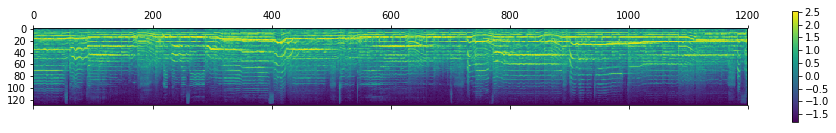

2


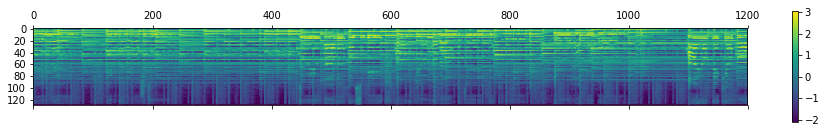

1


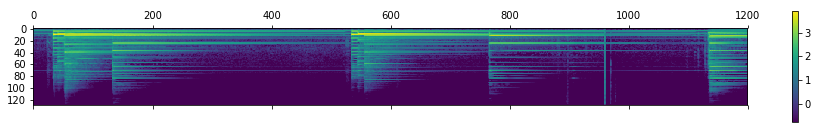

7


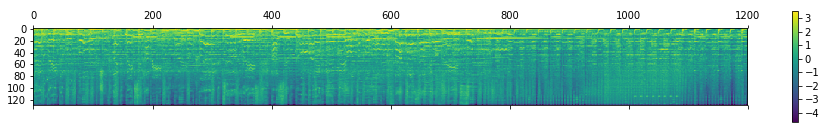

5


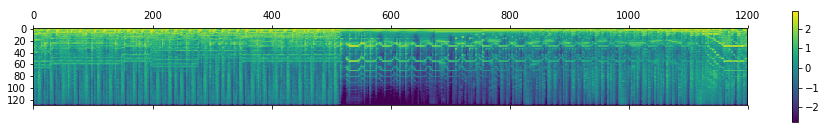

1


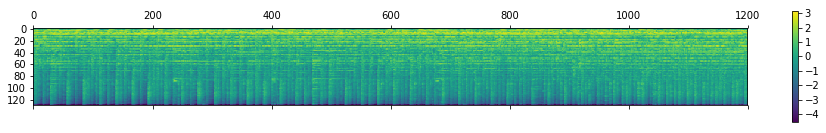

5


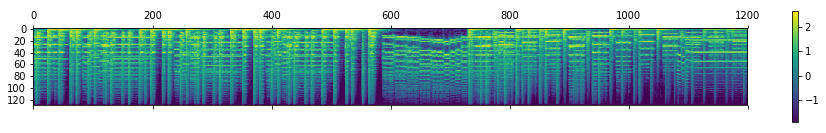

0


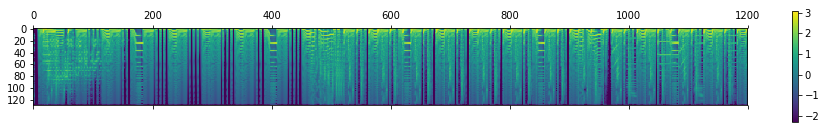

2


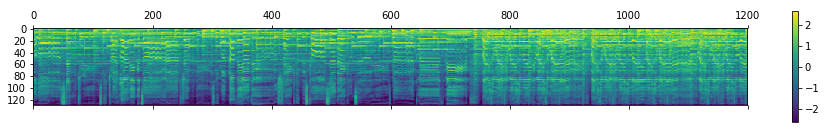

5


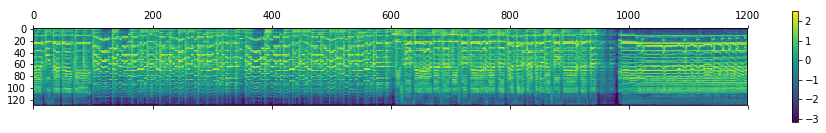

5


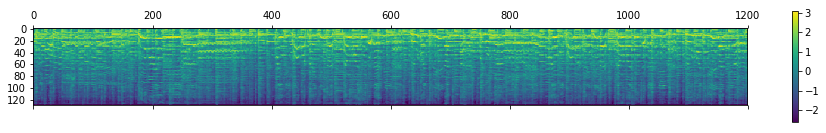

5


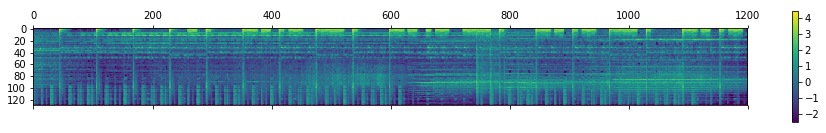

7


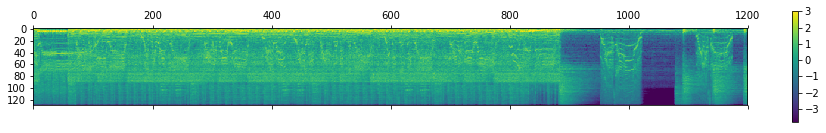

2


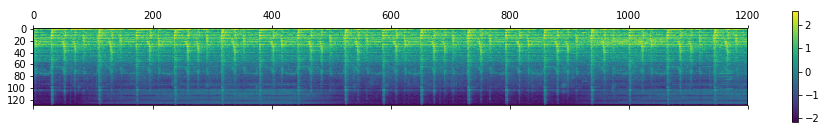

6


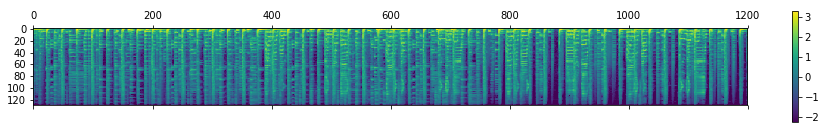

5


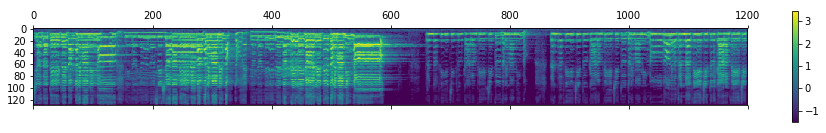

1


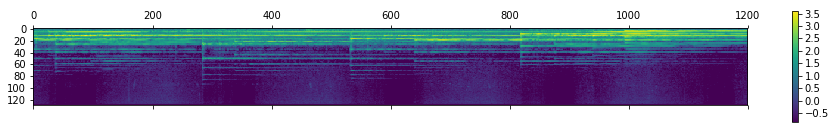

3


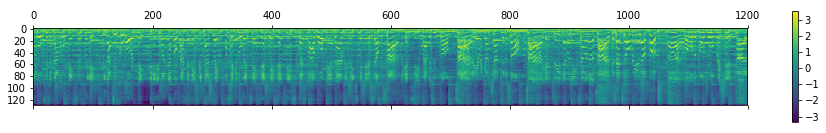

2


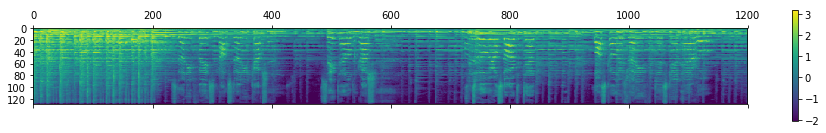

6


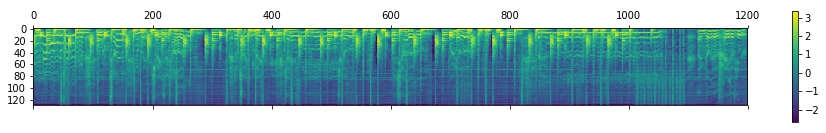

In [20]:
import matplotlib.pyplot as plt
print(x_train.shape)
# plt.matshow(x_train[0,:,:])
# plt.colorbar()

# plt.figure()
# plt.matshow(x_train[1,:,:])
# plt.colorbar()

# plt.figure()
# plt.matshow(x_train[2,:,:])
# plt.colorbar()

# plt.figure()

for i in range(20):
    plt.figure()
    plt.matshow(x_train[i,:,:])
    print(np.argmax(y_train[i,:]))
    plt.colorbar()
    plt.show()

In [13]:
model = Sequential()
model.add(Flatten(input_shape=(x_train.shape[1], x_train.shape[2])))


# model.add(Dense(200, activation='relu',kernel_regularizer=l2(0.05)))
# # model.add(Dense(100, activation='sigmoid',kernel_regularizer=l2(0.1)))


model.add(Dense(100,activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))
model.add(Dense(100,activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))
model.add(Dense(100,activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3, noise_shape=None, seed=None))


model.add(Dense(y_train.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 154800)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 100)               15480100  
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               10100     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
__________